In [66]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

#import classification modules
from sklearn.linear_model import LogisticRegression
# Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#import decision tree plotting libraries
# Metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
dataku = pd.read_csv('water_potability.csv')
dataku

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [69]:
dataku.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [70]:
dataset = dataku.dropna()

In [71]:
import math
dataset['ph'].fillna(math.floor(dataset['ph'].median()))
dataset['Sulfate'].fillna(math.floor(dataset['Sulfate'].median()))
dataset['Trihalomethanes'].fillna(math.floor(dataset['Trihalomethanes'].median()))

3       100.341674
4        31.997993
5        54.917862
6        84.603556
7        62.798309
           ...    
3267     55.069304
3268     28.878601
3269     41.558501
3270     60.419921
3271     66.687695
Name: Trihalomethanes, Length: 2011, dtype: float64

In [72]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [73]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [74]:
dataset.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [75]:
y=dataset["Potability"].copy()
X=dataset.drop(columns=["Potability"])
print(y.shape)
print(X.shape)

(2011,)
(2011, 9)


In [76]:
trainX, testX, trainy, testy= train_test_split(X,y, test_size=0.3, random_state=1)
# print("\n shape of train split: ")
print(trainX.shape)
# print("\n shape of testing split: ")
print(testX.shape)

(1407, 9)
(604, 9)


In [77]:
lrg=LogisticRegression()
lrg.fit(trainX,trainy)
predictions = lrg.predict(testX)
acclrg=accuracy_score(testy, predictions)*100
print("Accuracy of Logistic regression (%): \n",acclrg) 
recalllrg=recall_score(testy,predictions)*100
print("Recall of Logistic regression is: \n",recalllrg)
preclrg=precision_score(testy,predictions)*100
print("Precision of Logistic regression is: \n",preclrg)

Accuracy of Logistic regression (%): 
 62.086092715231786
Recall of Logistic regression is: 
 0.43859649122807015
Precision of Logistic regression is: 
 33.33333333333333


In [78]:
scores = cross_val_score(lrg, X, y, cv=5, scoring='accuracy')

In [79]:
print(scores)

[0.5955335  0.59950249 0.59701493 0.59452736 0.59950249]


In [80]:
print(scores.mean())

0.5972161524881794


In [81]:
k_range = range(1,30)
k_scores = []

for k in k_range:
    lrg=LogisticRegression(max_iter=k)
    scores = cross_val_score(lrg, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

In [82]:
k_scores

[0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5962211276125575,
 0.5962211276125575,
 0.5962211276125575,
 0.5962211276125575,
 0.5962211276125575,
 0.5967186400503685,
 0.5967186400503685,
 0.5967186400503685,
 0.5972161524881794,
 0.5972161524881794,
 0.5977136649259903,
 0.5977136649259903,
 0.5977136649259903,
 0.5977136649259903,
 0.5977136649259903,
 0.5977136649259903,
 0.5977136649259903]

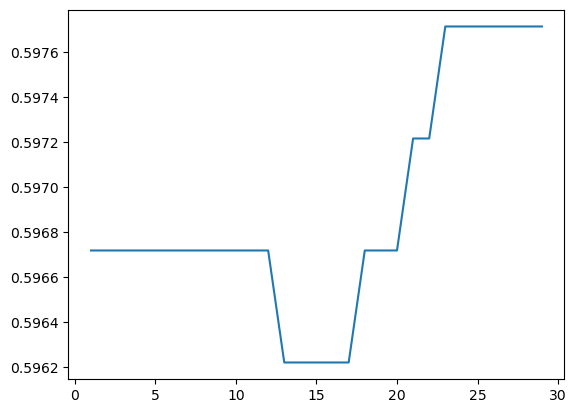

In [83]:
sns.lineplot(x = k_range, y = k_scores);